In [2]:
#--------------------------------------------------
#  LOAD PACKAGES
#--------------------------------------------------
require(ggplot2)
require(patchwork)
library(dplyr)
require(plantecophys)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: patchwork
Warning message:
"package 'patchwork' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: plantecophys


In [29]:
#--------------------------------------------------
#  LOAD FUNCTIONS
#--------------------------------------------------

setwd('C:/Users/fb428/OneDrive - University of Exeter/Documents/Tropoz/')
source('scripts/met_functions.R')

f = 'DD1'

#--------------------------------------------------
#  LOAD DATA
#--------------------------------------------------

Met_data <- read.csv(gsub(" ", "", paste('inputs/', f,'/',f,'_Met_5min.csv')))
Ozone_data <- read.csv(gsub(" ", "", paste('inputs/', f,'/',f,'_O3.csv')))

#--------------------------------------------------
#  MERGE DATA
#--------------------------------------------------

#Met_data$datetime <- strptime(Met_data$datetime, format="%d/%m/%Y %H:%M")

met_df <- merge_ozone_met(Met_data, Ozone_data, "%Y-%m-%d %H:%M")
df_time <- add_month_day_hour_DOY(met_df, '2020-01-01')

#--------------------------------------------------
#  FIND AVERAGES
#--------------------------------------------------

key_data = select(df_time, -c('Zero_Air', 'filled', 'date'))

hourly_average <- aggregate(. ~ Hour + Day + Month, na.omit(key_data), mean)
daily_average <- aggregate(. ~ Day + Month, key_data, mean)

cat('\n\n summary of hourly averages: \n')
colMeans(hourly_average)


#--------------------------------------------------
#  MAKE CSV INPUT FILES
#--------------------------------------------------

VPD_kPa <- RHtoVPD(hourly_average$RH, hourly_average$AirTC_Avg, Pa = 101)

csv_input <- data.frame(Day_of_year = hourly_average$Day_of_year,
                        Hour_of_day = hourly_average$Hour, 
                        Temperature = hourly_average$AirTC_Avg,
                        VPD = VPD_kPa, 
                        PAR = hourly_average$PAR_Den_Avg)

len_input <- nrow(csv_input)

csv_input$VPD <- VPD_kPa
csv_input$Pa <- c(rep(101,len_input))
csv_input$wind <- c(rep(0.75,len_input))
csv_input$ppt <- c(rep(0,len_input))

cat('\n\n csv column names: \n')
print(colnames(csv_input))

cat('\n\n saving files: \n')
for (i in 1:9){
    filename <- gsub(" ", "", paste('csv_input',i,'.csv'))
    chamber <- gsub(" ", "", paste('Cham_', i))
    
    save_file(filename, chamber)
    }


Time difference of 0 secs


 summary of hourly averages: 


Hour          Day        Month     datetime       Cham_1       Cham_2 
1.150000e+01 1.569917e+01 6.522469e+00 1.656687e+09 1.440510e+01 1.766953e+01 
      Cham_3       Cham_4       Cham_5       Cham_6       Cham_7       Cham_8 
3.069513e+01 1.268252e+01 2.221726e+01 3.728786e+01 2.781455e+01 4.098041e+01 
      Cham_9    AirTC_Avg           RH SlrRad_W_Avg  PAR_Den_Avg  Day_of_year 
4.391737e+01 2.371113e+01 7.901880e+01 1.728979e+02 3.626257e+02 9.125417e+02



 csv column names: 
[1] "Day_of_year" "Hour_of_day" "Temperature" "VPD"         "PAR"        
[6] "Pa"          "wind"        "ppt"        


 saving files: 
[1] "csv_input1.csv"
[1] "csv_input2.csv"
[1] "csv_input3.csv"
[1] "csv_input4.csv"
[1] "csv_input5.csv"
[1] "csv_input6.csv"
[1] "csv_input7.csv"
[1] "csv_input8.csv"
[1] "csv_input9.csv"


In [30]:
table(is.na(key_data))


 FALSE   TRUE 
989943      3 

In [31]:
summary(df_time[c('AirTC_Avg', 'PAR_Den_Avg', 'RH')])

   AirTC_Avg      PAR_Den_Avg              RH       
 Min.   : 8.39   Min.   :   0.0180   Min.   :28.79  
 1st Qu.:21.00   1st Qu.:   0.0530   1st Qu.:68.33  
 Median :23.32   Median :   0.6925   Median :83.80  
 Mean   :23.71   Mean   : 362.5752   Mean   :79.02  
 3rd Qu.:26.80   3rd Qu.: 546.4750   3rd Qu.:91.00  
 Max.   :36.86   Max.   :2654.0000   Max.   :96.60  
                 NA's   :3                          

png 
  2

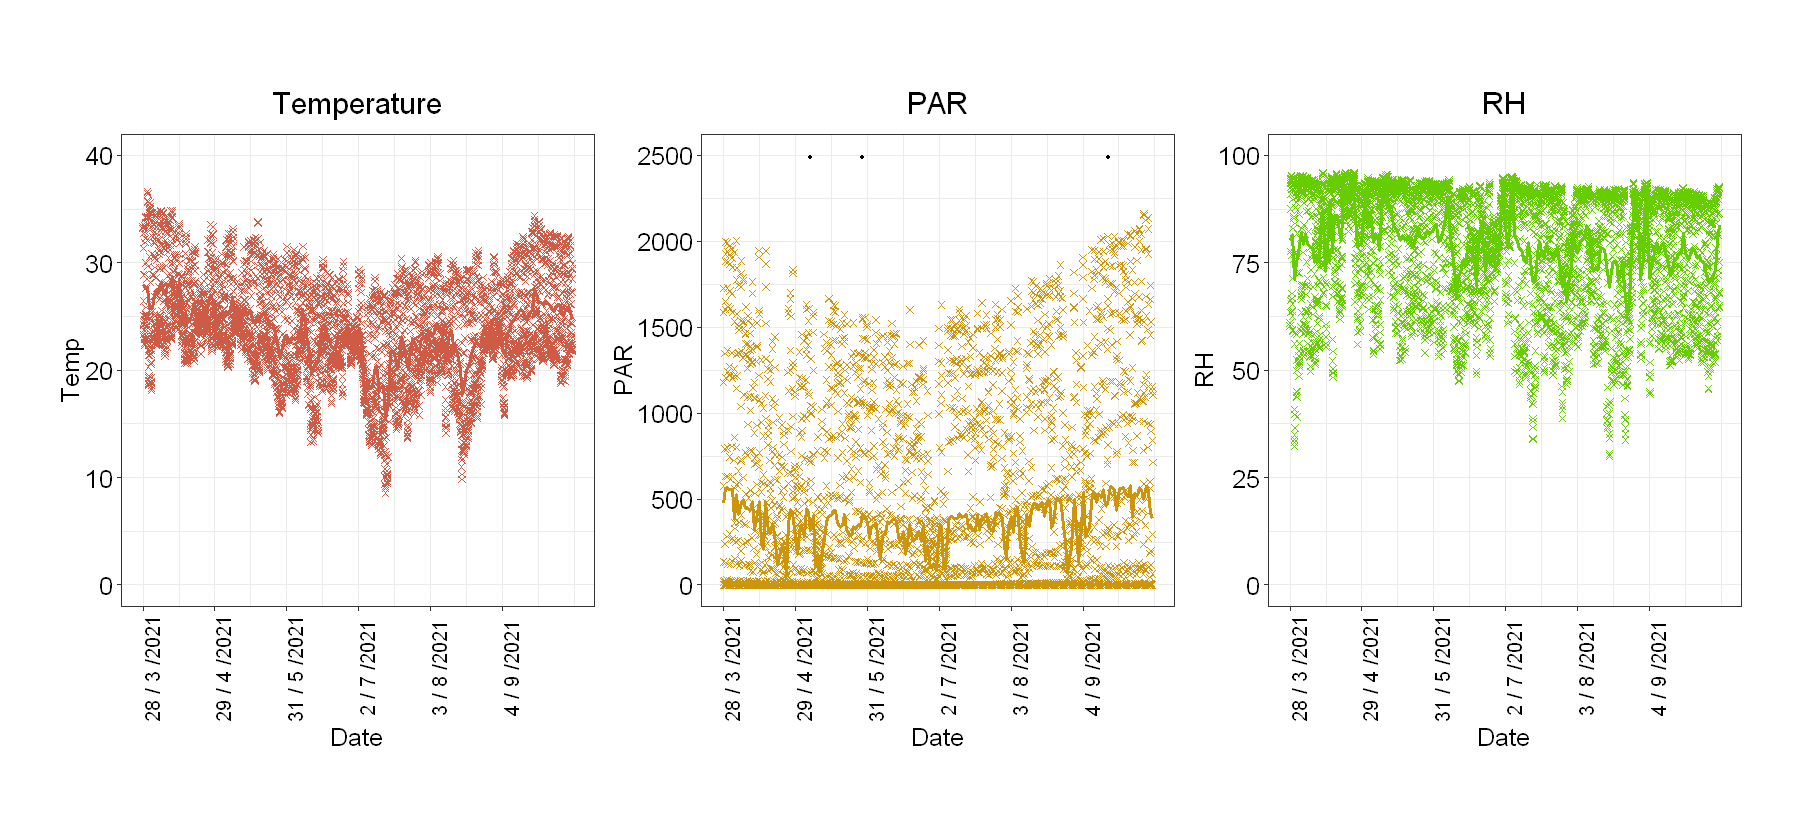

In [32]:
#--------------------------------------------------
#  MAKE AND SAVE FIGS
#--------------------------------------------------

# organise dates and space at regular intervals

s <- seq(1, nrow(daily_average), by = round(nrow(daily_average)/6))

days <- daily_average$Day[s]
months <- daily_average$Month[s]
locs <- as.numeric(daily_average$datetime[s])

dates <- list()

for (i in 1:length(days)){
    
    date <- paste(days[i],'/',months[i],'/2021')
    dates[i] <- date
}

# make plots

T <- ggplot()+
geom_point(data = hourly_average, aes(x = datetime, y = AirTC_Avg), colour = 'coral3', shape = 4)+
geom_line(data = daily_average, aes(x = datetime, y = AirTC_Avg), col = "coral3", size = 1)+
#geom_point(aes(y = 15, x = as.numeric(df_time$datetime[which(is.na(df_time$AirTC_avg))])), col = 'black', shape = 20)+


ggtitle('Temperature')+
theme_bw()+
  xlab('Date')+
  ylab('Temp')+
  theme(
    axis.text.y=element_text(size=15,colour="black"),
    axis.text.x=element_text(size=12,colour="black", angle = 90),
    line=element_line(colour="black"),
    axis.title=element_text(size=15),
    legend.position='left',
    plot.title=element_text(hjust=0.5, size = 18, margin=margin(0,0,10,0))
    )+
scale_x_continuous(breaks = locs, labels = dates)+
#xlim(0, 150)+
ylim(0, 40)

PAR <- ggplot()+
geom_point(data = hourly_average, aes(x = datetime, y = PAR_Den_Avg), colour = 'darkgoldenrod3', shape = 4)+
geom_line(data = daily_average, aes(x = datetime, y = PAR_Den_Avg), col = "darkgoldenrod3", size = 1)+
geom_point(aes(y = 2490, x = as.numeric(df_time$datetime[which(is.na(df_time$PAR_Den_Avg))])), col = 'black', shape = 20)+


ggtitle('PAR')+
theme_bw()+
  xlab('Date')+
  ylab('PAR')+
  theme(
    axis.text.y=element_text(size=15,colour="black"),
    axis.text.x=element_text(size=12,colour="black", angle = 90),
    line=element_line(colour="black"),
    axis.title=element_text(size=15),
    legend.position='left',
    plot.title=element_text(hjust=0.5, size = 18, margin=margin(0,0,10,0))
    )+
scale_x_continuous(breaks = locs, labels = dates)+
#xlim(0, 150)+
ylim(0, 2500)

RH <- ggplot()+
geom_point(data = hourly_average, aes(x = datetime, y = RH), colour = 'chartreuse3', shape = 4)+
geom_line(data = daily_average, aes(x = datetime, y = RH), col = "chartreuse3", size = 1)+
#geom_point(aes(y = 10, x = as.numeric(df_time$datetime[which(is.na(df_time$RH))])), col = 'black', shape = 20)+


ggtitle('RH')+
theme_bw()+
  xlab('Date')+
  ylab('RH')+
  theme(
    axis.text.y=element_text(size=15,colour="black"),
    axis.text.x=element_text(size=12,colour="black", angle = 90),
    line=element_line(colour="black"),
    axis.title=element_text(size=15),
    legend.position='left',
    plot.title=element_text(hjust=0.5, size = 18, margin=margin(0,0,10,0))
    )+
scale_x_continuous(breaks = locs, labels = dates)+

#xlim(0, 150)+
ylim(0, 100)

# save and display plot

png(gsub(" ", "", paste('outputs/script_output_',f,'/met_',f,'.png')), width =  40, height = 20, units='cm', res = 330)

T + PAR + RH +
  plot_layout(widths = unit(10, 'cm'), heights = unit(10, 'cm'))

dev.off()

options(repr.plot.width=15, repr.plot.height=7)
T + PAR + RH +
  plot_layout(widths = unit(10, 'cm'), heights = unit(10, 'cm'))